# <font style = "color:rgb(77,173, 255)"> **Diamonds Descriptive Analytics - Notebook 1** </font>

## <font style = "color:rgb(77,173, 255)"> **Business Case** </font>

The purpose of analyzing the `Diamonds` dataset is to determine if either a classification or regression patterns can be found in the data.

Our goal is to gain insights on the information. We hope to convert this insight into foresight (predictions) according to the patterns we see in the data.

## <font style = "color:rgb(77,173, 255)"> **Required Libraries** </font>

In [1]:
# Libraries used in this notebook

import ipywidgets as widgets

import pandas as pd

import missingno as msno

import plotly.express as px

import plotly.figure_factory as ff

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

## <font style = "color:rgb(77,173, 255)"> **Importing the dataset** </font>

The dataset diamond.csv has been downloaded from [Kaggle - beginner_datasets](https://www.kaggle.com/ahmettezcantekin/beginner-datasets).

In [2]:
# Specify the path to data source

diamonds_source_path = "../Diamonds/Datasets/diamond.csv"

In [3]:
# Create the dataframe called 'diamonds'

diamonds = pd.read_csv(diamonds_source_path)

diamonds

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


## <font style = "color:rgb(77, 173, 255)"> **Inspecting the data** </font>

Inspecting the data is the process of identifying:

1. There are no missing values
2. The dytpes are correct
3. The type of information contained in each feature
4. Classifying this data as either [categorical](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm) or [continous](https://www.mathsisfun.com/definitions/continuous-data.html) data 
5. Identifying potential features that could be a **target** or **class label**.

### <font style = "color:rgb(77, 173, 255)"> **How to inspect the data** </font>

You can quickly inspect the data set using the following commands:

> `df.info()` - Prints a summary of the data set. You can find more information about it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

> `df.describe()` - Generates descriptive statistics, for numerical features (continous or categorical). You can find more information about how to use it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

> `df.value_counts` - Returns a series containing counts of unique values, found in a feature. Is used to assess categorical values, regardless if they are numeric or not. You can find more information about how to use it here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html.

In the cells below, you will use these commands to inspect the features.

## <font style = "color:rgb(77,173, 255)"> **Feature Inspection** </font>

In [4]:
# Check for missing values and inspect datatypes

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


**There are no missing values and the datatypes of all features look fine.**

In [5]:
# Create a list of column names for further inspection of each feature
features = diamonds.columns

features

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

### <font style = "color:rgb(77, 173, 255)"> **Interactive Feature Inspection** </font>

In [6]:
# Create an interactive function to inspect each individual feature of the dataframe

@widgets.interact
def feature_describer(feature = features):
    if (diamonds[feature].dtype == "float64") or (diamonds[feature].dtype =="int64"):
        print("Continuous Information")
        print(diamonds[feature].describe())
    else:
        print("Categorical Information")
        print(diamonds[feature].value_counts())

interactive(children=(Dropdown(description='feature', options=('Carat Weight', 'Cut', 'Color', 'Clarity', 'Pol…

In [7]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## <font style = "color:rgb(77, 173, 255)"> **Definitions** </font>

To gain a better understanding of the diamonds data set, the following definitions will be applied, these defintions come from the following websites: 

> https://4cs.gia.edu/en-us/diamond-carat-weight/ 

> https://beyond4cs.com/grading/polish-and-symmetry/ 

> https://www.briangavindiamonds.com/news/gia-versus-agsl-diamond-grading-reports/

**Definitions**

* `Carat` - diamond carat weight measures how much a diamond weighs. A diamond price increases with diamond carat weight because larger diamonds are rarer and more desirable. However, two diamonds of equal carat weight can have very different values (and prices) depending on three other factors of the diamond 4Cs: Color, Clarity, and Cut.

* `Cut` - diamonds are renowned for their ability to transmit light and sparkle so intensely. Cut measures how well a diamond’s facets interact with light. Precise artistry and workmanship are required to fashion a stone so its proportions, symmetry and polish deliver the magnificent return of light only possible in a diamond. Achieving the best cut for a diamond reflects in the stone’s final beauty and value. And of all the diamond 4Cs, it is the most complex and technically difficult to analyze. To determine the cut grade of the standard round brilliant diamond – the shape that dominates the majority of diamond jewelry.

* `Color` - the diamond color evaluation of most gem-quality diamonds is based on the absence of color. A chemically pure and structurally perfect diamond has no hue, like a drop of pure water, and consequently, a higher value.

* `Clarity` - natural diamonds are the result of carbon exposed to tremendous heat and pressure deep in the earth. This process can result in a variety of internal characteristics called ‘inclusions’ and external characteristics called ‘blemishes.’  If you are trying to determine what is the best clarity for a diamond, remember that no diamond is perfectly pure. But the closer it comes to purity, the better its clarity.

* `Polish` - a well polished diamond can produce crisp reflections and undistorted light transmission while a poorly polished diamond can look dull.

* `Symmetry` - a diamond with poor symmetry will have a visible deviation from its shape and reduced brilliance due to misdirected light transmission.

* `Report` - either from the `Gemological Institute of America (GIA)` and the `American Gem Society Laboratory (AGSL)`. There is a distinct difference in how the two gemological laboratories determine the Overall Cut Grade of a diamond, while the `GIA` determines the cut grade of a diamond by taking polish, symmetry, and proportions into account, the `AGSL` uses a performance based system which takes those factors, plus the visual performance of the diamond into account. The diamond grading platform currently relied upon by the `AGSL`, is the most thorough of the cut grade systems in use by any of the top tier gemological laboratories. 

<img src="Diamonds_features_chart.png" alt="drawing" width="1100"/>

## <font style = "color:rgb(77,173, 255)"> **Data Dictionary** </font>

Below is a brief description of the data set features.

|Index       |Feature      |Description                                                                                           |Categorical or Continuous    | Range of Values                              |
|:-----------|:----------  |:---------------------------------------------------------------------------------------------------- |:----------------------------|:---------------------------------------------|
|0           |Carat Weight |Is the measurement of how much a diamond weighs. A metric "carat" is defined as 200 milligrams.       |Continuous                   |0.75 - 2.91                                   |
|1           |Cut          |Refers about how well a diamond's facets interact with light.                                         |Categorical                  |Signature-Ideal, Ideal, Very Good, Good, Fair |
|2           |Color        |GIA's D-to-Z color-grading system measures the degree of colorlessness of a diamond.                  |Categorical                  |D, E, F, G, H, I                              |
|3           |Clarity      |Refers to the internal features, called inclusions, and surface irregularities, called blemishes.     |Categorical                  |FL, IF, VVS1, VVS2, VS1, VS2, SI1             |
|4           |Polish       |Refers to the degree of smoothness of each facet of a diamond.                                        |Categorical                  |ID, EX, VG, G                                 |
|5           |Symmetry     |Refers to how precisely the various facets of a diamond align and intersect.                          |Categorical                  |ID, EX, VG, G                                 |
|6           |Report       |Refers to the gem lab that issues the diamond grading certificate.                                    |Categorical                  |GIA, AGSL                                     |
|7           |Price        |Price of the diamond.                                                                                 |Continuous                   |2,184.00 - 101,561.00                         |

## <font style = "color:rgb(77,173, 255)"> **Data Understanding** </font>

The purpose of this section is to examine the data by means of visualizations in order to gain a better understanding of the data distribution, discover paterns and reveal if there are any relationships between the features.     

### <font style = "color:rgb(77,173, 255)"> **Pie Charts** </font>

The purpose of a pie chart is to show a parts-to-whole relationship for categorical or nominal data. Pie charts work best with [categorical data](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm). Pie charts should not be used with [continous data](https://www.mathsisfun.com/definitions/continuous-data.html). Continous values will plot, but the results will typically not be meaningful.

You can learn more about pie charts, and where to use them at [storytellingwithdata.com](https://www.storytellingwithdata.com/blog/2020/5/14/what-is-a-pie-chart), and the [Statistical Knowledge Portal](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/pie-chart.html)

### <font style = "color:rgb(77, 173, 255)"> **Interactive Pie Chart** </font>

The code below will be used to create pie charts using the plotly library. You can learn more about plotly pie charts here: https://plotly.com/python/pie-charts/.

An automated process using widgets will be used to create interactive pie charts that can be used to inspect all categorical features.

In [8]:
# Define the categorical features 

cat_features= ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

In [9]:
# Create a function to inspect categorical features using a pie-chart

@widgets.interact
def pie_charts(feature = cat_features):
    fig = px.pie(diamonds, 
          values = None, 
          names = feature,
          height =600,
          width = 600)
    fig.show()

interactive(children=(Dropdown(description='feature', options=('Cut', 'Color', 'Clarity', 'Polish', 'Symmetry'…

From the pie charts we can explore if the distribution of data is balanced or inbalanced for each feature:
- `Cut`: the majority of the data observations are included in the top quality categories, ideal and very good.
- `Color`: the data is fairly balanced, with observations quite even distributed in all categories.
- `Clarity`: the majority of the data falls within the lowest quality categories.
- `Polish and Symmetry`: The majority of the data observations are included in two categories excellent and very good. 
- `Report`: the data is very unbalanced as the major number of observations fall within the "GIA" category. This feature will probably not be used later when creating the model.  

### <font style = "color:rgb(77, 173, 255)"> **Histograms** </font>

Histograms show the data shape. Histograms help you see the center, spread and shape of a set of data. They can also be used as a visual tool to check for normality.

You can learn more about histograms, and where to use them at [storytellingwithdata.com](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts) and the [Statistical Knowledge Portal](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/histogram.html).

### <font style = "color:rgb(77, 173, 255)"> **Interactive Histograms** </font>

The code below will be used to create histograms using the plotly library. You can learn more about plotly histograms here: https://plotly.com/python/histograms/.

An automated process using widgets will be used to create interactive histograms that can be used to inspect all features.

In the lines below will be created different options to make the histograms more flexible and versatile

In [10]:
# Create a list of categorical features to be used in combination with other features

labels = [None, 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

In [11]:
# Specify the order (from top to low quality) of the values for each of the categorical features 

cat_order = {'Cut':['Signature-Ideal', 'Ideal', 'Very Good', 'Good', 'Fair'], 'Color':['D','E','F','G','H','I'], 'Clarity':['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1'], \
             'Polish':['ID', 'EX', 'VG', 'G'], 'Symmetry':['ID', 'EX', 'VG', 'G'], 'Report':['GIA', 'AGSL']}

In [12]:
# Create a list of marginals to visualize the distributions

marginals = widgets.RadioButtons(options = [None, 'rug', 'box', 'violin']) # created as radiobuttons

In [13]:
# This checkbox allows to enable/disable a log scale for the x-axis

log_scaleX = widgets.Checkbox(value = False, #default
                              description = 'Log X scale',
                              disabled = False,
                              indent = False)

In [14]:
# This checkbox allows to enable/disable a log scale for the y-axis

log_scaleY = widgets.Checkbox(value = False, #default
                              description = 'Log Y scale',
                              disabled = False,
                              indent = False)

In [15]:
# Create options for the histogram style: relative (stacked), grouped or overlayed

style = widgets.RadioButtons(options = ["relative", "group", "overlay"])

In [16]:
# Create a function to produce interactive histograms  

@widgets.interact
def feature_histogram(distribution = marginals, style = style, feature = features, label = labels, log_x = log_scaleX, log_y = log_scaleY, bins = int(input("Enter # of bins:"))):
    fig = px.histogram(diamonds,
          x = feature,
          color = label, 
          nbins = bins,
          marginal = distribution,
          category_orders = cat_order,
          barmode = style,
          log_x = log_x,
          log_y = log_y,
          height = 800, 
          width = 1400)
    fig.show()

Enter # of bins: 20


interactive(children=(RadioButtons(description='distribution', options=(None, 'rug', 'box', 'violin'), value=N…

### <font style = "color:rgb(77, 173, 255)"> **Box Plots** </font>

A box plot shows the distribution of data for a continuous variable. Box plots help you see the center and spread of data. They can also be used as a visual tool to check for normality or to identify points that may be outliers.

You can learn more about box plot, and where to use them at [Statistical Knowledge Portal.](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/box-plot.html)

### <font style = "color:rgb(77, 173, 255)"> **Interactive Box Plots** </font>

The code below will be used to create box plots using the plotly library. You can learn more about plotly histograms here: https://plotly.com/python/box-plots/

An automated process using widgets will be used to create interactive box plots that can be used to inspect the distribution of the continuous features.

In [17]:
# Create a list of the continuous features to be plot in the y-axis

cont_features = ['Carat Weight', 'Price']

In [18]:
# Create a function to produce interactive box plots

@widgets.interact
def feature_boxplots(cont_feature = cont_features, cat_feature = cat_features, label = labels):
    fig = px.box(diamonds,    
                 x = cat_feature,
                 y = cont_feature,
                 color = label,
                 category_orders = cat_order,
                 height = 800,
                 width = 1400)
    fig.show()

interactive(children=(Dropdown(description='cont_feature', options=('Carat Weight', 'Price'), value='Carat Wei…

In [19]:
# Create interactive box plots for Price vs each of the categorical features

@widgets.interact
def feature_boxplots(feature = cat_features, label = labels):
    fig = px.box(diamonds, 
                 x = feature,
                 y = 'Price',
                 log_y = True,
                 color = label,
                 category_orders = cat_order,
                 height = 800,
                 width = 1400)
    fig.show()

interactive(children=(Dropdown(description='feature', options=('Cut', 'Color', 'Clarity', 'Polish', 'Symmetry'…

### <font style = "color:rgb(77, 173, 255)"> **Heatmaps** </font>

A heatmap uses color to show changes and magnitude of a third variable to a two-dimensional plot. Heatmaps are used to help show patterns and changes. While they can be used to show changes over time, they are not designed for detailed analysis.

You can learn more about heatmaps, and where to use them at [Statistical Knowledge Portal.](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/heatmap.html)

In [20]:
# To create a heatmap first convert the string values of the categorical features to numeric values

# Create a copy of the diamonds dataframe, with all features having numeric values
df = diamonds.copy()

# Covert the string categories into numerical categories 
for column in df.columns:
    if(df[column].dtype == 'object'):
        df[column] = df[column].astype('category')
        df[column] = df[column].cat.codes

df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171
...,...,...,...,...,...,...,...,...
5995,1.03,2,0,2,0,0,1,6250
5996,1.00,4,0,2,3,3,1,5328
5997,1.02,2,0,2,0,0,1,6157
5998,1.27,3,3,3,0,0,1,11206


In [21]:
# Create a correlation matrix that will be plot as a heatmap

df.corr()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
Carat Weight,1.000000,0.022967,0.114013,0.045964,-0.030965,-0.048523,0.011461,0.858562
Cut,0.022967,1.000000,-0.006224,-0.000235,0.057422,0.085636,0.070297,0.023828
Color,0.114013,-0.006224,1.000000,0.010730,0.012315,0.019480,-0.105868,-0.149257
Clarity,0.045964,-0.000235,0.010730,1.000000,-0.046666,-0.037538,-0.083674,0.122370
Polish,-0.030965,0.057422,0.012315,-0.046666,1.000000,0.378196,-0.078467,-0.063132
Symmetry,-0.048523,0.085636,0.019480,-0.037538,0.378196,1.000000,-0.077608,-0.075767
Report,0.011461,0.070297,-0.105868,-0.083674,-0.078467,-0.077608,1.000000,0.013493
Price,0.858562,0.023828,-0.149257,0.122370,-0.063132,-0.075767,0.013493,1.000000


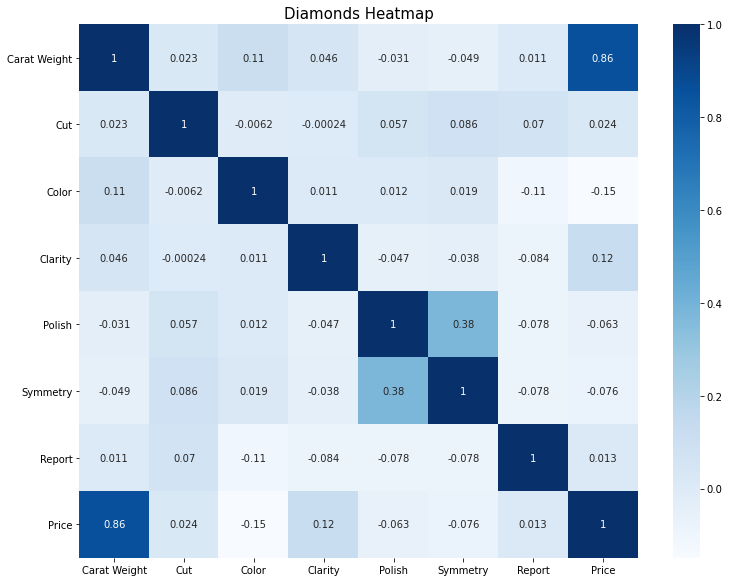

In [22]:
# Create a simple heatmap of the diamonds correlation matrix

fig = plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(),
            cmap = 'Blues',
            annot = True)
plt.tight_layout()
plt.title('Diamonds Heatmap', fontsize = 15)
plt.show()

In [23]:
# Create a Heatmap with the mean values of the categorical features

In [24]:
# Create a dataframe that will include the mean values of the categorical features
df_mean = df.copy()

# Create columns with the mean values of the categorical features
for column in df_mean.columns:
    if (df_mean[column].dtype == 'int8'):  #categorical columns were converted to numerical integer in steps above
        df_mean[column + '_mean'] = df_mean.groupby(column)["Price"].transform('mean')

df_mean

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Cut_mean,Color_mean,Clarity_mean,Polish_mean,Symmetry_mean,Report_mean
0,1.10,2,4,2,3,0,1,5169,13127.331185,10487.347544,8018.864012,11278.606476,13201.976688,11842.879795
1,0.83,2,4,3,2,2,0,3470,13127.331185,10487.347544,13694.113255,11693.848739,11656.302632,11423.529973
2,0.85,2,4,2,0,0,1,3183,13127.331185,10487.347544,8018.864012,12918.599175,13201.976688,11842.879795
3,0.91,2,1,2,3,3,1,4370,13127.331185,11539.190231,8018.864012,11278.606476,11146.818784,11842.879795
4,0.83,2,3,2,0,0,1,3171,13127.331185,12520.050633,8018.864012,12918.599175,13201.976688,11842.879795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,2,0,2,0,0,1,6250,13127.331185,15255.783661,8018.864012,12918.599175,13201.976688,11842.879795
5996,1.00,4,0,2,3,3,1,5328,11484.696870,15255.783661,8018.864012,11278.606476,11146.818784,11842.879795
5997,1.02,2,0,2,0,0,1,6157,13127.331185,15255.783661,8018.864012,12918.599175,13201.976688,11842.879795
5998,1.27,3,3,3,0,0,1,11206,11541.525692,12520.050633,13694.113255,12918.599175,13201.976688,11842.879795


In [25]:
# Subset the mean columns and create a correlation matrix

df_mean = df_mean[['Cut_mean', 'Color_mean', 'Clarity_mean', 'Polish_mean', 'Symmetry_mean',
       'Report_mean', 'Carat Weight','Price']]

df_mean.corr()

,Cut_mean,Color_mean,Clarity_mean,Polish_mean,Symmetry_mean,Report_mean,Carat Weight,Price
Cut_mean,1.000000,0.004092,0.147651,0.273102,0.378236,-0.107699,0.115123,0.147152
Color_mean,0.004092,1.000000,0.081105,0.020585,0.025375,0.081552,-0.071737,0.175077
Clarity_mean,0.147651,0.081105,1.000000,0.096671,0.081953,-0.066980,0.122343,0.355619
Polish_mean,0.273102,0.020585,0.096671,1.000000,0.530541,0.006253,0.076870,0.108662
Symmetry_mean,0.378236,0.025375,0.081953,0.530541,1.000000,0.025973,0.066092,0.104956
Report_mean,-0.107699,0.081552,-0.066980,0.006253,0.025973,1.000000,0.011461,0.013493
Carat Weight,0.115123,-0.071737,0.122343,0.076870,0.066092,0.011461,1.000000,0.858562
Price,0.147152,0.175077,0.355619,0.108662,0.104956,0.013493,0.858562,1.000000


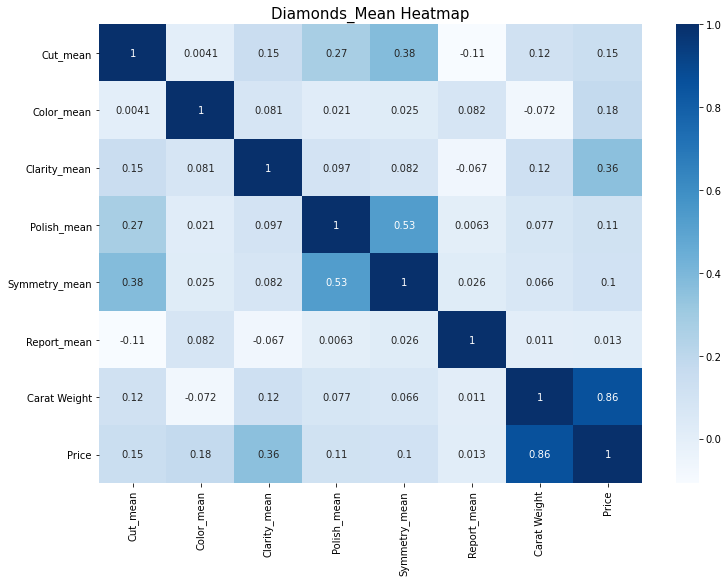

In [26]:
# Create a heatmap for the diamonds_mean correlation matrix

fig = plt.figure(figsize=(11, 8))
sns.heatmap(df_mean.corr(),
            cmap = 'Blues',
            annot = True)
plt.tight_layout()
plt.title('Diamonds_Mean Heatmap', fontsize = 15)
plt.show()

- From the above heatmaps is clear that there is a relatively stronger positive correlation between `Carat Weight` and `Price`. In general, the bigger the diamond the higher the price.
- `Simmetry` and `Polish` features have the highest positive relationship, compared with other features' relationships.
- Although not strong, `Clarity`is the other only feature that shows a mild possitive relationship with `Price`.

### <font style = "color:rgb(77, 173, 255)"> **Scatter Plots** </font>

A scatter plot shows the relationship between two continuous variables. Scatter plots are used to show relationships. For correlation, scatter plots help show the strength of the linear relationship between two variables. For regression, scatter plots often add a fitted line. In quality control, scatter plots can often include specification limits or reference lines.

You can learn more about scatter plots, and where to use them at [Statistical Knowledge Portal.](https://www.jmp.com/en_us/statistics-knowledge-portal/exploratory-data-analysis/scatter-plot.html)

### <font style = "color:rgb(77, 173, 255)"> **Interactive Scatter Plots** </font>

The code below will be used to create scatter plots using the plotly library. You can learn more about plotly scatter plots here: https://plotly.com/python/line-and-scatter/

An automated process using widgets will be used to create interactive scatter plots that can be used to inspect the relationship of the two continuous features Carat Weight and Price.

In [27]:
# Create a function to produce interactive scatterplots  

@widgets.interact
def feature_scatter(label = labels, row = labels):
    fig = px.scatter(diamonds, 
                     x = "Carat Weight", 
                     y = "Price",
                     color = label, 
                     facet_row = row,
                     category_orders = cat_order,
                     log_y = True,
                     height =1200,
                     width = 800)
    fig.show()

interactive(children=(Dropdown(description='label', options=(None, 'Cut', 'Color', 'Clarity', 'Polish', 'Symme…

### <font style = "color:rgb(77, 173, 255)"> **Parallel Coordinates** </font>

A Parallel Coordinates visualization is used for plotting multivariate, numerical data. Parallel Coordinates Plots are ideal for comparing many variables together and seeing the relationships between them.

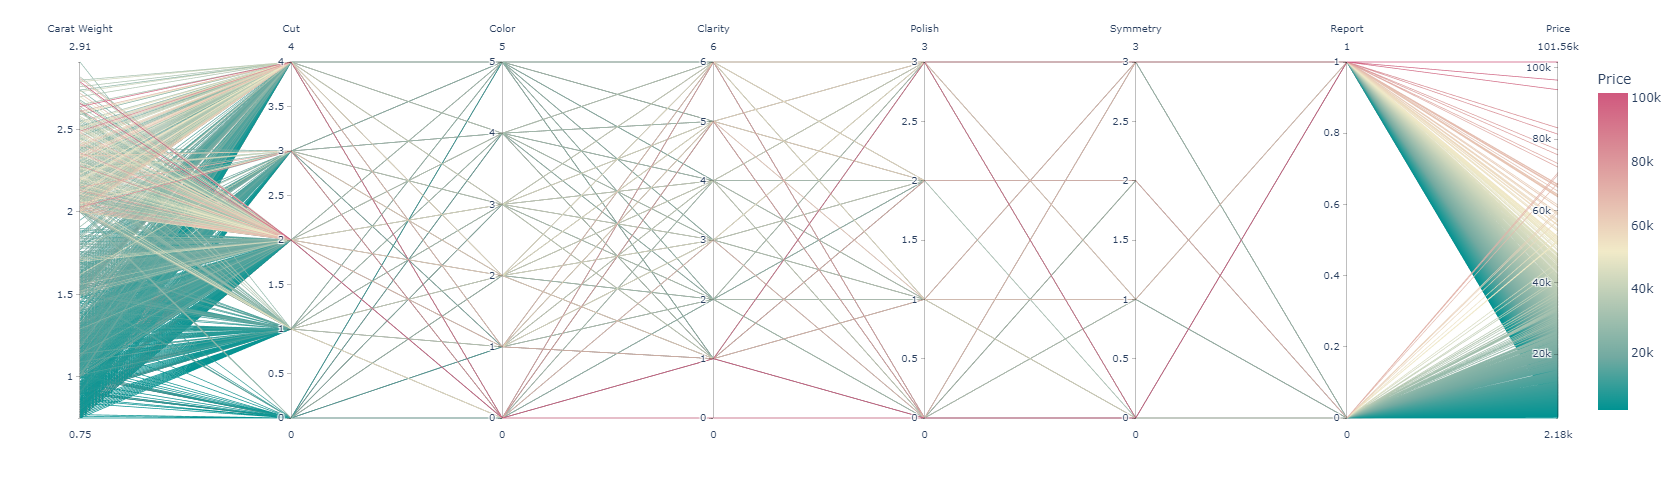

In [28]:
# Use dataframe df which includes numerical values for all features

fig = px.parallel_coordinates(df, 
                              color = "Price", 
                              color_continuous_scale = px.colors.diverging.Tealrose,
                              width = 1200,
                              height = 500)
fig.show()

### <font style = "color:rgb(77, 173, 255)"> **Parallel Categories** </font>

The parallel categories diagram (also known as parallel sets or alluvial diagram) is a visualization of multi-dimensional categorical data sets. Each variable in the data set is represented by a column of rectangles, where each rectangle corresponds to a discrete value taken on by that variable. The relative heights of the rectangles reflect the relative frequency of occurrence of the corresponding value.

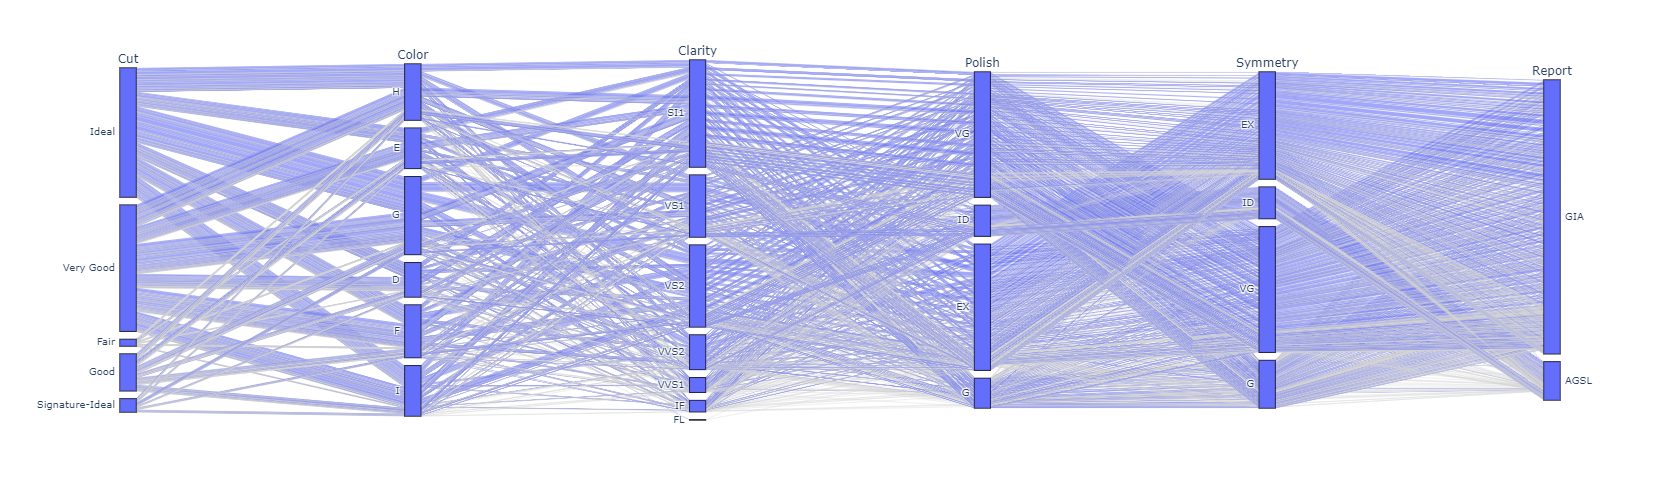

In [29]:
# Use the original dataframe diamonds which includes categorical values for the categorical features

fig = px.parallel_categories(diamonds,
                             #color = "Price",
                             #color_continuous_scale=px.colors.sequential.Turbo,
                             width = 1200,
                             height = 500)

fig.show()

## <font style = "color:rgb(77, 173, 255)"> **Continuous Features to Categorical** </font>

In [30]:
# Create bins for the continuous features Price and Carat Weight to be used when creating the ML models

In [31]:
# Create a categorical feature for Carat Weight

Carat_weight_cat = pd.cut(diamonds['Carat Weight'], bins = [0, 1.0, 1.2, 2.0, np.inf], 
       labels = ['1ct','1.2ct','2ct', '2ct+'])

diamonds["Carat Weight Cat"] = Carat_weight_cat

In [33]:
df_cat

plt.hist(df_cat['Carat Weight Cat'])
plt.show()

NameError: name 'df_cat' is not defined

In [ ]:
# Create a categorical feature for Price

price_cat = pd.cut(diamonds['Price'], bins = [0, 6000, 10000, 30000, np.inf], #use np.inf for last category 
       labels = ['0-6k', '6k-10k','10k-30k','30k+'])

diamonds['Price Cat'] = price_cat

In [ ]:
df_cat

plt.hist(df_cat['Price Cat'])
plt.show()

In [ ]:
# Print tha diamonds dataframe with the new categoricaL features included
diamonds = diamonds[['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report', 'Carat Weight', 'Carat Weight Cat', 'Price', 'Price Cat']].sort_values("Carat Weight Cat")

diamonds